In [1]:
import numpy as np
import pandas as pd

import glob
import cv2

import matplotlib.pyplot as plt
import seaborn as sns

import imageio
from skimage.transform import rescale
from PIL import Image
import scipy.ndimage as ndi

from skimage import color, filters, exposure, morphology
from skimage.feature import canny
from skimage.filters import gaussian, sobel

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')
sns.set_context('notebook')

In [3]:
num_NoDR = len(glob.glob('./archive/colored_images/No_DR*/*'))
num_MildNPDR = len(glob.glob('./archive/colored_images/Mild_NPDR/*'))
num_ModNPDR = len(glob.glob('./archive/colored_images/Moderate_NPDR*/*'))
num_SevNPDR = len(glob.glob('./archive/colored_images/Severe_NPDR/*'))
num_PDR = len(glob.glob('./archive/colored_images/Proliferate_DR/*'))

In [4]:
print('There are {} eyes without diabetic retinopathy'.format(num_NoDR))
print('There are {} eyes with mild non-proliferative diabetic retinopathy'.format(num_MildNPDR))
print('There are {} eyes with moderate non-proliferative diabetic retinopathy'.format(num_ModNPDR))
print('There are {} eyes with severe non-proliferative diabetic retinopathy'.format(num_SevNPDR))
print('There are {} eyes with proliferative diabetic retinopathy'.format(num_PDR))
print('The total number of eyes is', num_NoDR+num_MildNPDR+num_ModNPDR+num_SevNPDR+num_PDR)

There are 25810 eyes without diabetic retinopathy
There are 2270 eyes with mild non-proliferative diabetic retinopathy
There are 5292 eyes with moderate non-proliferative diabetic retinopathy
There are 873 eyes with severe non-proliferative diabetic retinopathy
There are 708 eyes with proliferative diabetic retinopathy
The total number of eyes is 34953


In [5]:
DR_eyes = [num_MildNPDR,num_ModNPDR,num_SevNPDR,num_PDR]
DR_names = ['Mild_NPDR', 'Moderate_NPDR', 'Severe_NPDR', 'Proliferative_DR']
all_eyes = [num_NoDR,num_MildNPDR,num_ModNPDR,num_SevNPDR,num_PDR]
all_names = ['No_DR','Mild_NPDR', 'Moderate_NPDR', 'Severe_NPDR', 'Proliferative_DR']

In [6]:
column_names = ['Diagnosis', 'Count']

dr_df = pd.DataFrame([DR_names, DR_eyes]).T
dr_df.columns = column_names

all_df = pd.DataFrame([all_names, all_eyes]).T
all_df.columns = column_names

In [7]:
print(dr_df,'\n'),print(all_df)

          Diagnosis Count
0         Mild_NPDR  2270
1     Moderate_NPDR  5292
2       Severe_NPDR   873
3  Proliferative_DR   708 

          Diagnosis  Count
0             No_DR  25810
1         Mild_NPDR   2270
2     Moderate_NPDR   5292
3       Severe_NPDR    873
4  Proliferative_DR    708


(None, None)

In [8]:
sns.catplot(x='Count', y='Diagnosis', data=all_df, kind='bar')

plt.show()

In [9]:
sns.catplot(x='Count', y='Diagnosis', data=dr_df, kind='bar', order=['Moderate_NPDR', 'Mild_NPDR', 'Severe_NPDR', 
                                                                    'Proliferative_DR'])

plt.title('Number of eyes at each stage')

plt.savefig('./figures/countplot.png')

In [10]:
right_eyes = len(glob.glob('./archive/colored_images/*/*right.png'))
left_eyes = len(glob.glob('./archive/colored_images/*/*left.png'))

In [11]:
plt.bar(x=['Right eyes', 'Left_eyes'], height=[right_eyes,left_eyes])
plt.show()

# Importing data

In [12]:
NoDR_list = []

for filename in glob.glob('./archive/colored_images/No_DR1/*.png'):
        im = Image.open(filename)
        NoDR_list.append(im)
        
        if len(NoDR_list) > 9:
            break

In [13]:
MildNPDR_list = []

for filename in glob.glob('./archive/colored_images/Mild_NPDR/*.png'):
        im = Image.open(filename)
        MildNPDR_list.append(im)
        
        if len(MildNPDR_list) > 9:
            break

In [14]:
ModerateNPDR_list = []

for filename in glob.glob('./archive/colored_images/Moderate_NPDR1/*.png'):
        im = Image.open(filename)
        ModerateNPDR_list.append(im)
        
        if len(ModerateNPDR_list) > 9:
            break

In [15]:
SevereNPDR_list = []

for filename in glob.glob('./archive/colored_images/Severe_NPDR/*.png'):
        im = Image.open(filename)
        SevereNPDR_list.append(im)
        
        if len(SevereNPDR_list) > 9:
            break

In [16]:
ProliferativeDR_list = []

for filename in glob.glob('./archive/colored_images/Proliferate_DR/*.png'):
        im = Image.open(filename)
        ProliferativeDR_list.append(im)
        
        if len(ProliferativeDR_list) > 9:
            break

# Selecting a good image for  each diagnosis

In [17]:
sns.set_style('white')

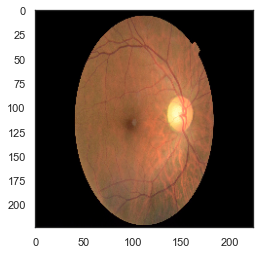

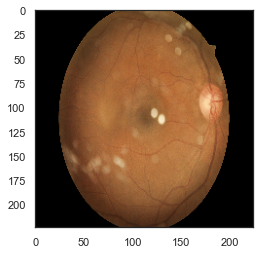

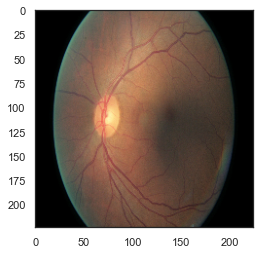

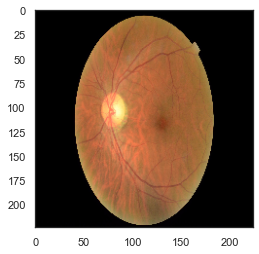

In [18]:
for image in NoDR_list:
    plt.imshow(image)
    
    plt.show()

In [19]:
NDRgt = NoDR_list[9]

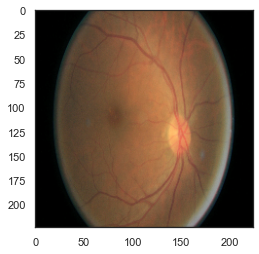

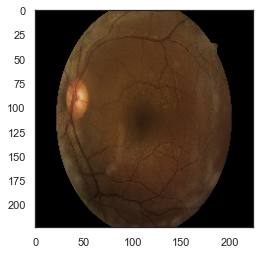

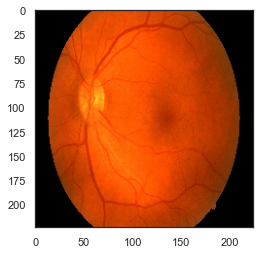

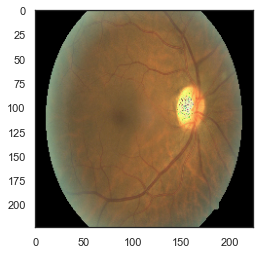

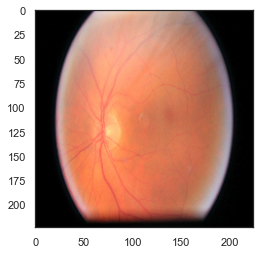

In [20]:
for image in MildNPDR_list:
    plt.imshow(image)
    
    plt.show()

In [21]:
MildNPDRgt = MildNPDR_list[2]

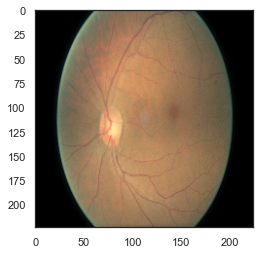

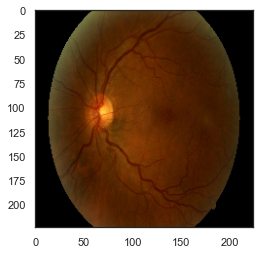

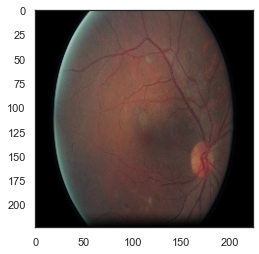

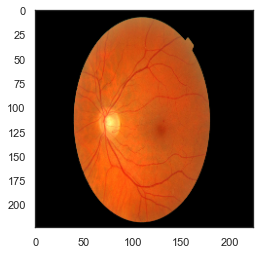

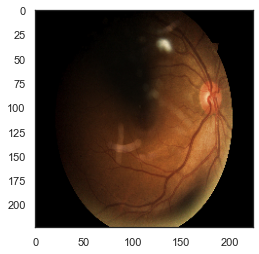

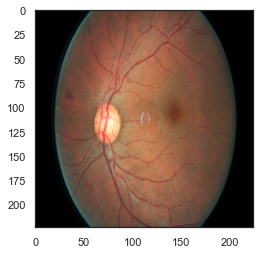

In [22]:
for image in ModerateNPDR_list:
    plt.imshow(image)
    
    plt.show()

In [23]:
ModNPDRgt = ModerateNPDR_list[-3]

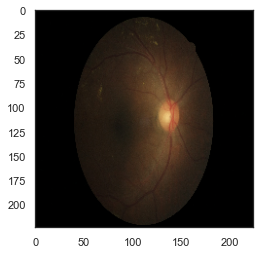

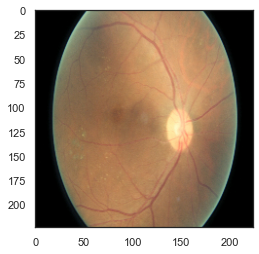

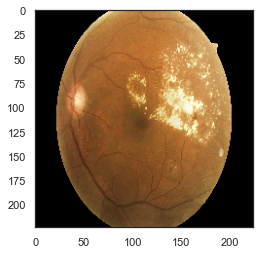

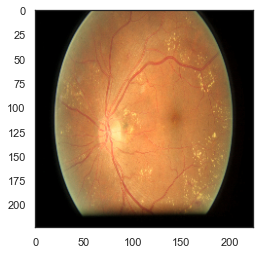

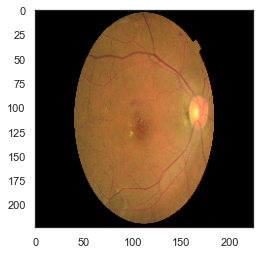

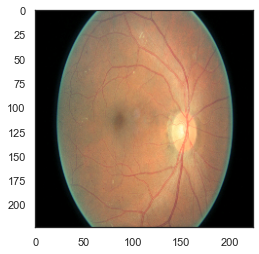

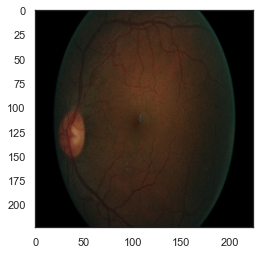

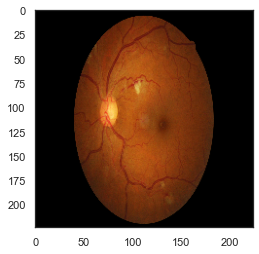

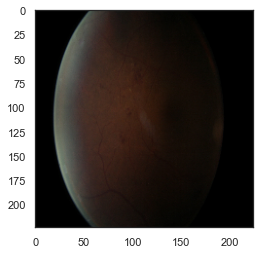

In [24]:
for image in SevereNPDR_list:
    plt.imshow(image)
    
    plt.show()

In [25]:
SevNPDRgt = SevereNPDR_list[3]

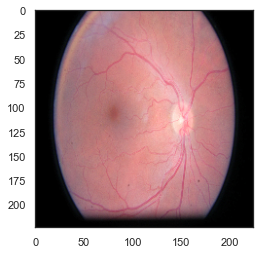

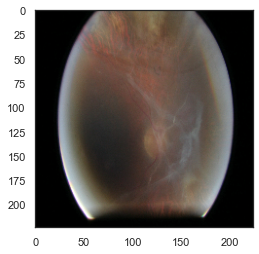

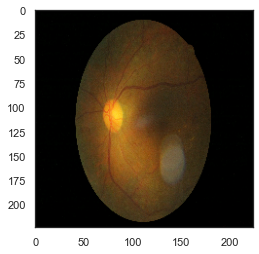

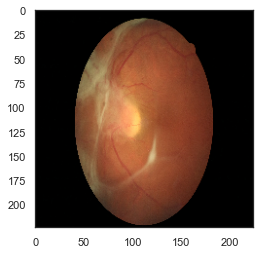

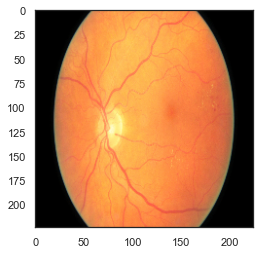

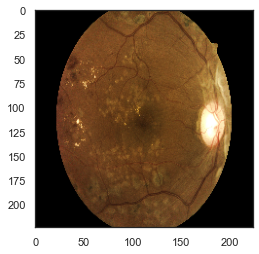

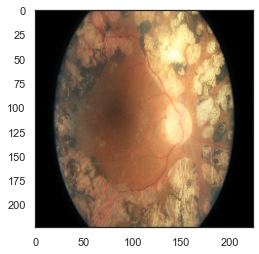

In [26]:
for image in ProliferativeDR_list:
    plt.imshow(image)
    
    plt.show()

In [27]:
PDRgt = ProliferativeDR_list[0]

# Viewing ground truths

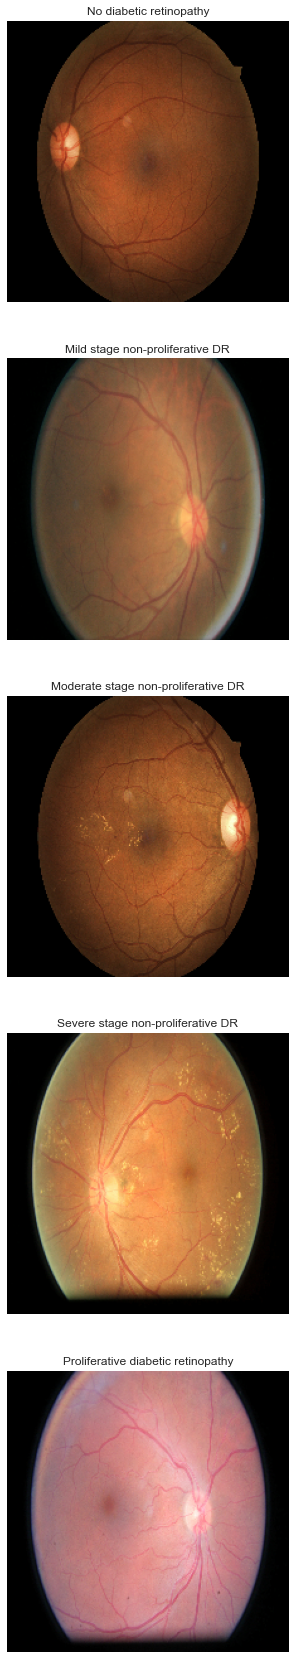

In [28]:
fig, axes = plt.subplots(5,1,figsize=(30, 30))

axes[0].imshow(NDRgt)
axes[1].imshow(MildNPDRgt)
axes[2].imshow(ModNPDRgt)
axes[3].imshow(SevNPDRgt)
axes[4].imshow(PDRgt)

axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
axes[3].axis('off')
axes[4].axis('off')

axes[0].set_title('No diabetic retinopathy')
axes[1].set_title('Mild stage non-proliferative DR')
axes[2].set_title('Moderate stage non-proliferative DR')
axes[3].set_title('Severe stage non-proliferative DR')
axes[4].set_title('Proliferative diabetic retinopathy')

plt.savefig('./figures/DRimages.png')

# Image exploration

In [29]:
def show_image(image, title='Image', cmap_type='gray'):
    """Displays and provides a title for an image"""
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [30]:
def plot_comparison(original, filtered, title_filtered):
    """Plots two images for comparison"""
    fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(16,12), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

In [31]:
# source: https://www.kaggle.com/ratthachat/aptos-eye-preprocessing-in-diabetic-retinopathy
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

In [32]:
# source: https://www.kaggle.com/taindow/pre-processing-train-and-test-images
def circle_crop(img):   
    """
    Create circular crop around image centre    
    """    
      
    height, width, depth = img.shape    
    
    x = int(width/2)
    y = int(height/2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    
    return img 

In [33]:
gtimages = [NDRgt, MildNPDRgt, ModNPDRgt, SevNPDRgt, PDRgt]

In [34]:
def to_array(im_list):
    """Converts images in a list to numpy arrays"""
    array_images = [np.array(image) for image in im_list]
    
    return array_images

In [35]:
array_images = to_array(gtimages)

# Transformation functions

In [36]:
def to_gray(im_array):
    """Applies grayscale transformation"""
    
    grayscale_images = [color.rgb2gray(image) for image in im_array]
    
    return grayscale_images

In [37]:
gray_images = to_gray(array_images)

In [38]:
def to_sobel(im_array):
    """Applies sobel filter"""
    
    sobel_images = [sobel(image) for image in im_array]
    
    return sobel_images

In [39]:
sobel_images = to_sobel(gray_images)

In [40]:
def to_canny(im_array, sigma=0.75):
    """Applies canny filter"""
    
    canny_edges = [canny(image, sigma=sigma) for image in im_array]
    
    return canny_edges

In [41]:
canny_images = to_canny(gray_images)

In [42]:
def to_equalize(im_array, clip_limit=0.25):
    """Applies equalization filter"""
    
    eq_images = [exposure.equalize_adapthist(image, clip_limit=clip_limit) for image in im_array]
    
    return eq_images

In [43]:
equalized_images = to_equalize(array_images)

In [44]:
def to_gaussian(im_array):
    """Applies gaussian filter"""

    gaussian_image = [gaussian(image, multichannel=True) for image in im_array]
    
    return gaussian_image

In [45]:
gaussian_images = to_gaussian(array_images)

In [46]:
def to_cropped(im_array):
    """Crops the image"""
    
    cropped_images = [circle_crop(image) for image in im_array]
    
    return cropped_images

In [47]:
cropped_images = to_cropped(array_images)

# Save image functions

In [48]:
def grayscale(im_array):
    """Returns and saves grayscale images"""

    gray_images = [color.rgb2gray(image) for image in im_array]
    
    fig, axes = plt.subplots(5,1,figsize=(20, 20))

    for i in range(len(gray_images)):
    
        axes[i].imshow(gray_images[i], cmap='gray')
        axes[i].axis('off')
        axes[0].set_title('grayscale images')
        
    plt.savefig('./figures/grayscale.png')

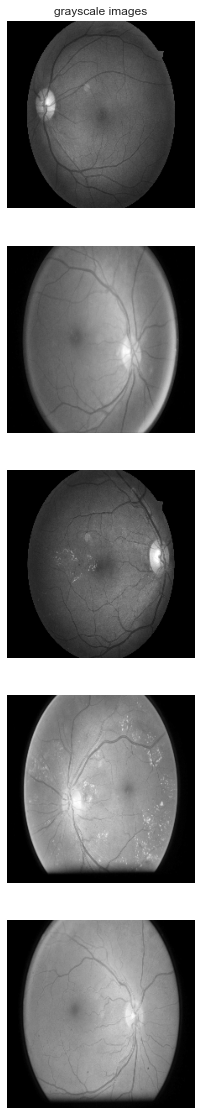

In [49]:
grayscale(array_images)

In [50]:
def sobel_edges(im_array):
    """Returns and saves images with sobel filter"""

    sobel_images = [sobel(image) for image in im_array]
    
    fig, axes = plt.subplots(5,1,figsize=(20, 20))

    for i in range(len(sobel_images)):
    
        axes[i].imshow(sobel_images[i], cmap='gray')
        axes[i].axis('off')
        axes[0].set_title('sobel edge images')
        
    plt.savefig('./figures/sobel.png')

In [51]:
sobel_edges(gray_images)

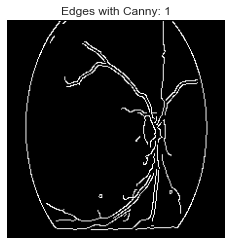

In [52]:
sigmas = [0.1, 0.5, 1, 2, 5]

for i in sigmas:
    
    canny_edges = canny(gray_images[4], sigma=i)

    show_image(canny_edges, "Edges with Canny: {}".format(i))

In [53]:
def canny_image(im_array, sigma=0.5):
    """Applies canny edge detection on all images in a list"""
    
    canny_edges = [canny(image, sigma=sigma) for image in im_array]
    
    fig, axes = plt.subplots(5,1,figsize=(20, 20))
    
    for i in range(len(canny_edges)):
    
        axes[i].imshow(canny_edges[i])
        axes[i].axis('off')
        axes[0].set_title('canny edge images')
        
        plt.savefig('./figures/cannyimages.png')

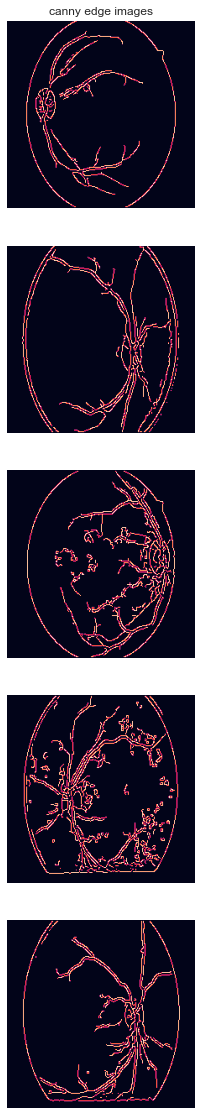

In [54]:
canny_image(gray_images, sigma=0.75)

In [55]:
def exposed(im_array, clip_limit):
    """Returns and saves images with exposure filter"""

    eq_images = [exposure.equalize_adapthist(image, clip_limit=clip_limit) for image in im_array]
    
    fig, axes = plt.subplots(5,1,figsize=(20, 20))

    for i in range(len(eq_images)):
    
        axes[i].imshow(eq_images[i], cmap='gray')
        axes[i].axis('off')
        axes[0].set_title('exposure images')
        
    plt.savefig('./figures/exposure.png')

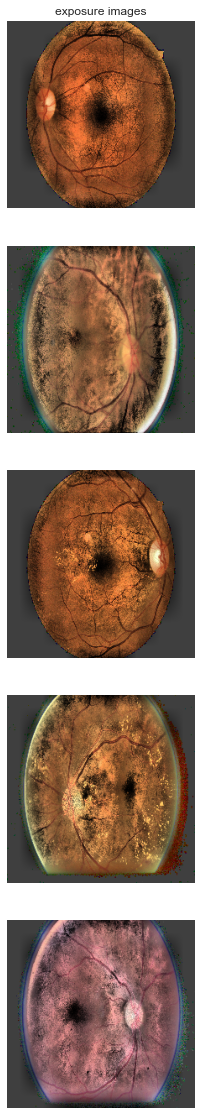

In [56]:
exposed(array_images, 0.25)

In [57]:
def gaussian_image(im_array):
    """Applies a gaussian filter on all images in a list"""
    
    gaussian_image = [gaussian(image, multichannel=True) for image in im_array]
        
    fig, axes = plt.subplots(5,1,figsize=(20, 20))
        
    for i in range(len(gaussian_image)):

        axes[i].imshow(gaussian_image[i])
        axes[i].axis('off')
        axes[0].set_title('gaussian images')
        
        plt.savefig('./figures/gaussianimages.png')

In [58]:
gaussian_image(array_images)

In [59]:
def crop_images(im_array):
    """Applies the crop to all images in a list"""
    
    cropped = [circle_crop(image) for image in im_array]
    
    fig, axes = plt.subplots(5,1,figsize=(20, 20))
    
    for i in range(len(cropped)):
        
        axes[i].imshow(cropped[i])
        axes[i].axis('off')
        axes[0].set_title('cropped images')

    plt.savefig('./figures/croppedimages.png')        

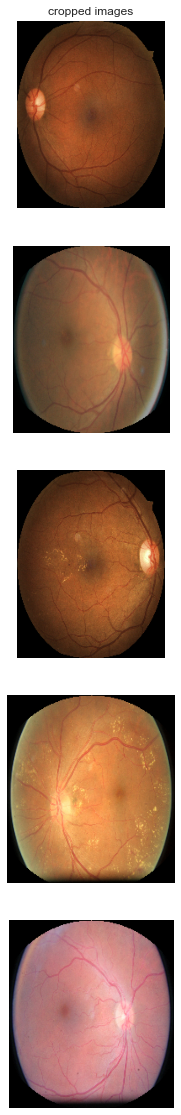

In [60]:
crop_images(array_images)

In [61]:
fig,axes = plt.subplots(5,6,figsize=(16,16))

for i in range(len(array_images)):
    
    axes[i,0].imshow(gray_images[i], cmap='gray')
    axes[i,0].axis('off')
    axes[0,0].set_title('gray images')
    
    axes[i,1].imshow(sobel_images[i], cmap='gray')
    axes[i,1].axis('off')
    axes[0,1].set_title('sobel edge images')
    
    axes[i,2].imshow(canny_images[i])
    axes[i,2].axis('off')
    axes[0,2].set_title('canny edge images')
    
    axes[i,3].imshow(equalized_images[i])
    axes[i,3].axis('off')
    axes[0,3].set_title('equalized images')
    
    axes[i,4].imshow(gaussian_images[i])
    axes[i,4].axis('off')
    axes[0,4].set_title('gaussian images')
    
    axes[i,5].imshow(cropped_images[i])
    axes[i,5].axis('off')
    axes[0,5].set_title('cropped images')
        
plt.show()

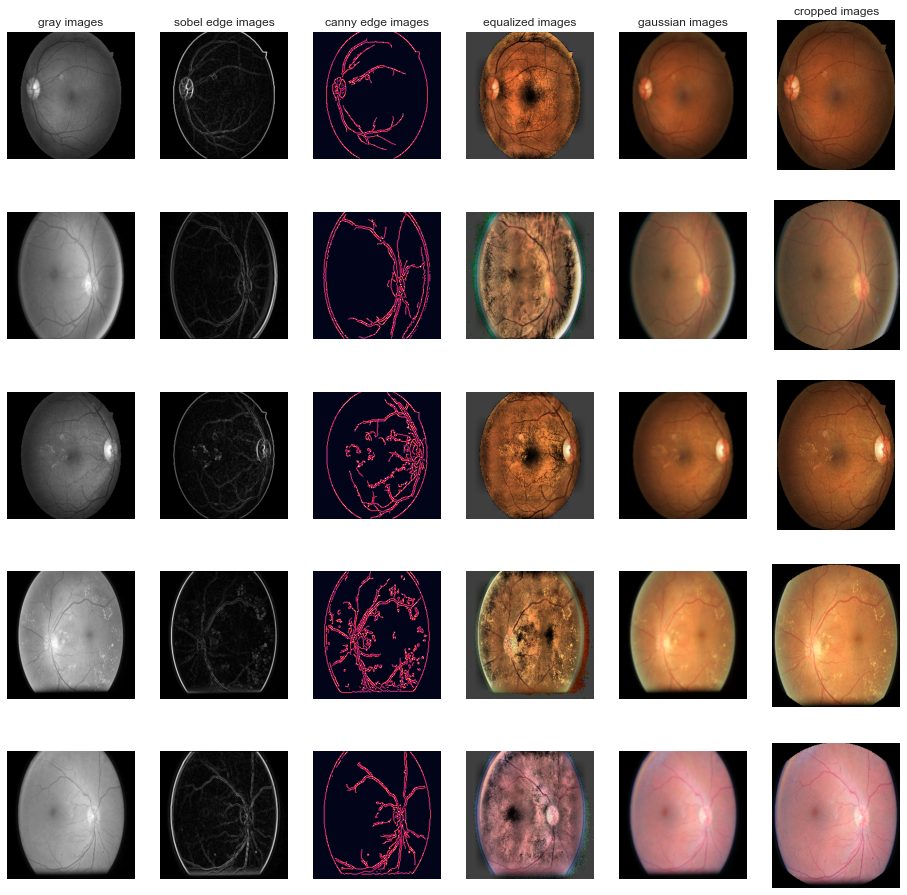

In [62]:
fig,axes = plt.subplots(5,6,figsize=(16,16))

for i in range(len(array_images)):
    
    axes[i,0].imshow(gray_images[i], cmap='gray')
    axes[i,0].axis('off')
    axes[0,0].set_title('gray images')
    
    axes[i,1].imshow(sobel_images[i], cmap='gray')
    axes[i,1].axis('off')
    axes[0,1].set_title('sobel edge images')
    
    axes[i,2].imshow(canny_images[i])
    axes[i,2].axis('off')
    axes[0,2].set_title('canny edge images')
    
    axes[i,3].imshow(equalized_images[i])
    axes[i,3].axis('off')
    axes[0,3].set_title('equalized images')
    
    axes[i,4].imshow(gaussian_images[i])
    axes[i,4].axis('off')
    axes[0,4].set_title('gaussian images')
    
    axes[i,5].imshow(cropped_images[i])
    axes[i,5].axis('off')
    axes[0,5].set_title('cropped images')
        
plt.savefig('./figures/modifiedimages.png')

In [63]:
#plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')